<a href="https://colab.research.google.com/github/frank-lacriola/Data-Science-Lab/blob/main/Lab8_Regression_timeSeries_WW2_temps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


1.   f1(x) = x · sin(x) + 2x
2.   f2(x) = 10 sin(x) + x^2
3.   f3(x) = sign(x)(x^2 + 300) + 20 sin(x)




# 1.1 - 1.4 Regression to synthetic data



In [2]:
tr = 20
n_samples = 100
X = np.linspace(-tr, tr, n_samples)


In [3]:
f1 = np.multiply(X, np.sin(X)) + np.multiply(X, 2)
f2 = np.multiply(10, np.sin(X)) + np.power(X, 2)
f3 = np.multiply(np.sign(X), np.power(X, 2)+300) + np.multiply(20, np.sin(X))

In [4]:
y = f3
X_train, X_test, y_train, y_test = train_test_split(
  X, y, train_size=0.7, random_state=42, shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()

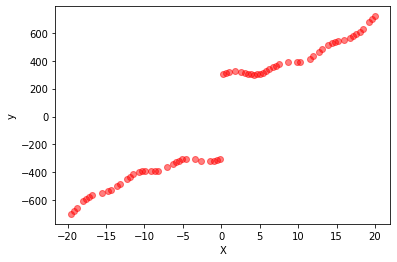

In [5]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Let's start with linear regression


In [6]:

reg = LinearRegression(fit_intercept = True) # default
reg.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE for OLS regression is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE for OLS regression is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 for OLS regression is: ", r2_score(y_test, y_test_pred))

The MAE for OLS regression is:  83.00990341591526
The MSE for OLS regression is:  13568.763949623855
The R2 for OLS regression is:  0.9322327960738965


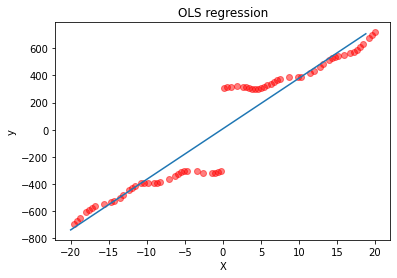

In [7]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)

m, b = np.polyfit(X_test, y_test_pred, 1)
plt.plot(X_test, m*X_test + b)

plt.xlabel("X")
plt.ylabel("y")
plt.title("OLS regression")
plt.show()

Epsilon-Support Vector Regression.



In [8]:
from sklearn.svm import SVR

reg = SVR(epsilon=0.1, kernel='rbf') # default
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE for OLS regression is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE for OLS regression is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 for OLS regression is: ", r2_score(y_test, y_test_pred))

The MAE for OLS regression is:  457.8367962938813
The MSE for OLS regression is:  304500.1614636245
The R2 for OLS regression is:  -0.520781451726037


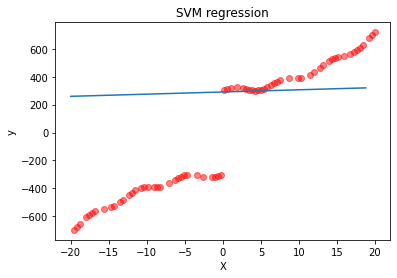

In [9]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)

m, b = np.polyfit(X_test, y_test_pred, 1)
plt.plot(X_test, m*X_test + b)

plt.xlabel("X")
plt.ylabel("y")
plt.title("SVM regression")
plt.show()

Ridge Regression.

In [10]:
from sklearn.linear_model import Ridge

reg = Ridge(fit_intercept=True) # default
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE  is: ", mean_squared_error(y_test, y_test_pred))
print("The R2  is: ", r2_score(y_test, y_test_pred))

The MAE is:  82.99599437078463
The MSE  is:  13569.372683993237
The R2  is:  0.932229755839259


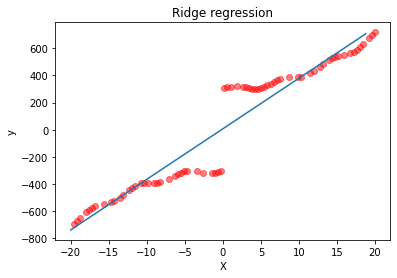

In [11]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)

m, b = np.polyfit(X_test, y_test_pred, 1)
plt.plot(X_test, m*X_test + b)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge regression")
plt.show()

MLP Regression; it optimizes the squared error using LBFGS or stochastic gradient descent


In [12]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(max_iter=200) # default
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE  is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE  is: ", mean_squared_error(y_test, y_test_pred))
print("The R2  is: ", r2_score(y_test, y_test_pred))

The MAE  is:  390.4857674768351
The MSE  is:  160434.67170100173
The R2  is:  0.19873253346111597


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


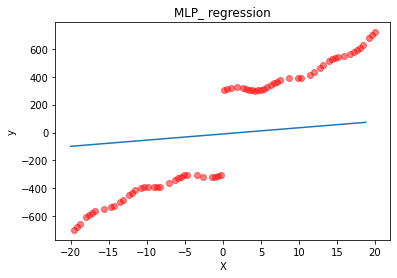

In [13]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)

m, b = np.polyfit(X_test, y_test_pred, 1)
plt.plot(X_test, m*X_test + b)

plt.xlabel("X")
plt.ylabel("y")
plt.title("MLP_ regression")
plt.show()

RF Regressor


In [14]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor() # default
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE  is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE  is: ", mean_squared_error(y_test, y_test_pred))
print("The R2  is: ", r2_score(y_test, y_test_pred))

The MAE  is:  5.16685539513234
The MSE  is:  68.94343070374302
The R2  is:  0.9996556721345281


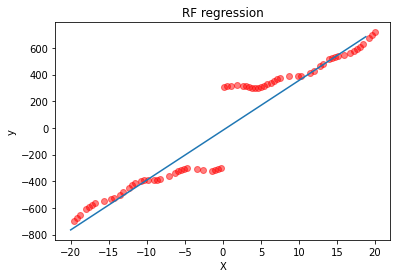

In [15]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)

m, b = np.polyfit(X_test, y_test_pred, 1)
plt.plot(X_test, m*X_test + b)

plt.xlabel("X")
plt.ylabel("y")
plt.title("RF regression")
plt.show()

Most performing with f1:


1.   RF Regressor 
The MAE  is:  2.0993614635551348
The MSE  is:  7.329359963003432
The R2  is:  0.9862133813492747

2.   MLP/Ridge: The MAE is:  5.851781153913739
The MSE is:  54.961160365684144
The R2  is:  0.896617363263935

Most performing with f2:



1.   RF: The MAE  is:  4.992875327624448
The MSE  is:  41.209433223350075
The R2  is:  0.9967524816461003


Most performing with f3:



1.   RF: The MAE  is:  5.529194811721336
The MSE  is:  70.31744458614494
The R2  is:  0.9996488098234649
2.  Ridge/Linear Regresison: The MAE is:  82.99599437078463
The MSE  is:  13569.372683993237
The R2  is:  0.932229755839259





# 1.5 Polynomial / Trigonometric features 

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


1.   f1(x) = x · sin(x) + 2x
2.   f2(x) = 10 sin(x) + x^2
3.   f3(x) = sign(x)(x^2 + 300) + 20 sin(x)




In [17]:
tr = 20
n_samples = 100
y = f3
X_train, X_test, y_train, y_test = train_test_split(
  X, y, train_size=0.7, random_state=42, shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()

In [18]:
X_train.shape, y_train.shape

((70,), (70,))

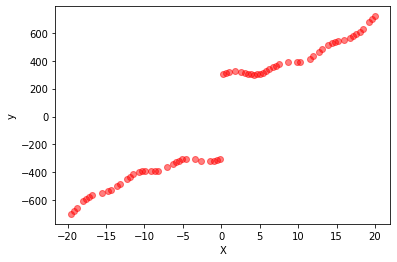

In [19]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Let's start with linear regression


In [20]:
reg = make_pipeline(PolynomialFeatures(5), LinearRegression())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  63.64794812910757
The MSE is:  7508.528298696274
The R2 is:  0.9624997552988771


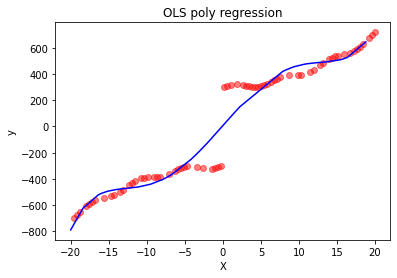

In [21]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("OLS poly regression")
plt.show()

Epsilon-Support Vector Regression.



In [22]:
from sklearn.svm import SVR

reg = make_pipeline(PolynomialFeatures(5), SVR())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  474.41929880671864
The MSE is:  326552.8592373479
The R2 is:  -0.6309204203676184


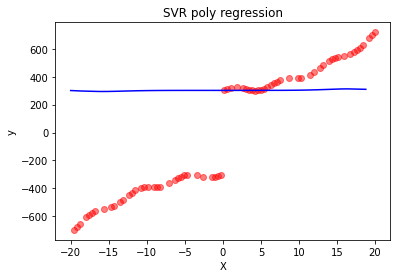

In [23]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("SVR poly regression")
plt.show()

Ridge Regression.

In [24]:
from sklearn.linear_model import Ridge

reg = make_pipeline(PolynomialFeatures(5), Ridge())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  63.47541517501624
The MSE is:  7507.305781631645
The R2 is:  0.962505860981276


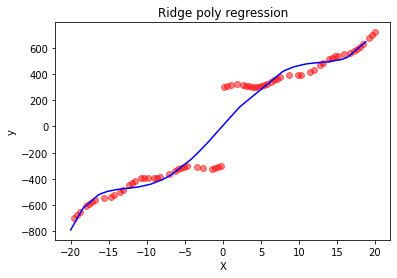

In [25]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge poly regression")
plt.show()

MLP Regression; it optimizes the squared error using LBFGS or stochastic gradient descent


In [26]:
from sklearn.neural_network import MLPRegressor

reg = make_pipeline(PolynomialFeatures(5), MLPRegressor())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  6132.021699803384
The MSE is:  231573992.57369846
The R2 is:  -1155.5623837946443


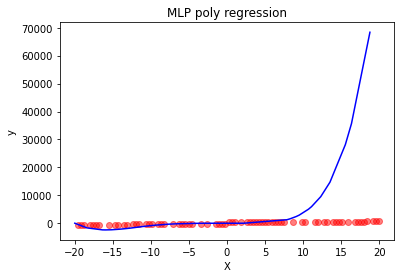

In [27]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("MLP poly regression")
plt.show()

RF Regressor


In [28]:
from sklearn.ensemble import RandomForestRegressor

reg = make_pipeline(PolynomialFeatures(5), RandomForestRegressor())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  8.180860967889007
The MSE is:  118.92081777298058
The R2 is:  0.999406067395748


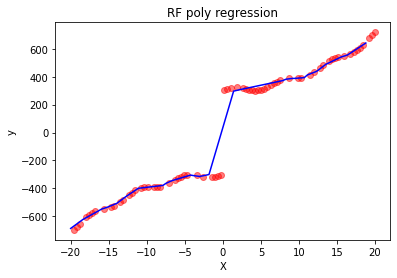

In [29]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("RF poly regression")
plt.show()

Most performing with f1:


1.   RF Regressor 0.99


2.   MLP/Ridge 0.89

Most performing with f2:



1.   RF/Ridge OLS 0.99


Most performing with f3:



1.   RF: 0.999
2.  Ridge: 0.96





# 1.6 Injecting Noise


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [31]:
def inject_noise(y):
  """Add a random noise drawn from a normal distribution."""
  return y + np.random.normal(0, 50, size=y.size)

In [32]:
tr = 20
n_samples = 100
y = f2
y = inject_noise(y)
X_train, X_test, y_train, y_test = train_test_split(
  X, y, train_size=0.7, random_state=42, shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()

In [33]:
X_train.shape, y_train.shape

((70,), (70,))

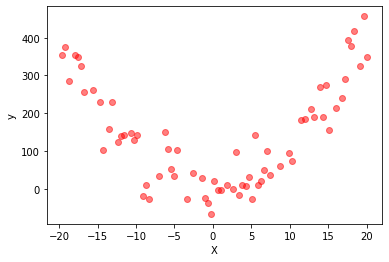

In [34]:
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Let's start with linear regression


In [35]:
reg = make_pipeline(PolynomialFeatures(5), LinearRegression())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  40.285696198521705
The MSE is:  2627.6575411543326
The R2 is:  0.8458424460414504


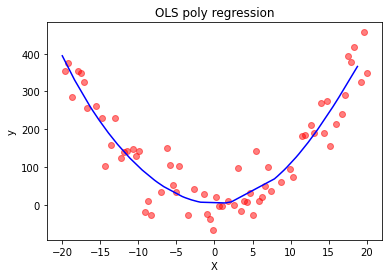

In [36]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("OLS poly regression")
plt.show()

Epsilon-Support Vector Regression.



In [37]:
from sklearn.svm import SVR

reg = make_pipeline(PolynomialFeatures(5), SVR())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  99.35829647066605
The MSE is:  15371.064487161499
The R2 is:  0.09822126134481324


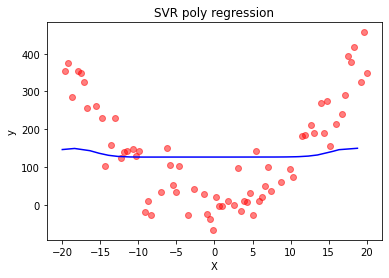

In [38]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("SVR poly regression")
plt.show()

Ridge Regression.

In [39]:
from sklearn.linear_model import Ridge

reg = make_pipeline(PolynomialFeatures(5), Ridge())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  40.28575453274994
The MSE is:  2627.662952362961
The R2 is:  0.8458421285804902


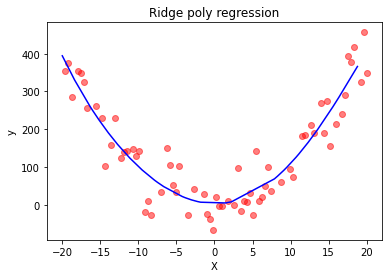

In [40]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge poly regression")
plt.show()

MLP Regression; it optimizes the squared error using LBFGS or stochastic gradient descent


In [41]:
from sklearn.neural_network import MLPRegressor

reg = make_pipeline(PolynomialFeatures(5), MLPRegressor(random_state=1, max_iter=50))
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  6294.734966614691
The MSE is:  145666463.49554384
The R2 is:  -8544.857043608745


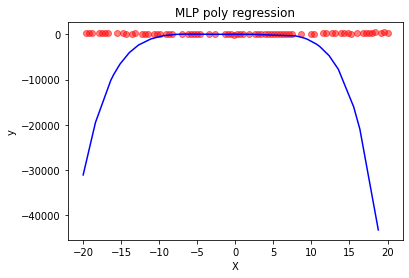

In [42]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("MLP poly regression")
plt.show()

RF Regressor


In [43]:
from sklearn.ensemble import RandomForestRegressor

reg = make_pipeline(PolynomialFeatures(5), RandomForestRegressor())
reg.fit(X_train.reshape(-1, 1), y_train)
y_test_pred = reg.predict(X_test.reshape(-1, 1))

print("The MAE is: ", mean_absolute_error(y_test, y_test_pred))
print("The MSE is: ", mean_squared_error(y_test, y_test_pred))
print("The R2 is: ", r2_score(y_test, y_test_pred))

The MAE is:  49.020821115164686
The MSE is:  3643.9652126148267
The R2 is:  0.7862184264544715


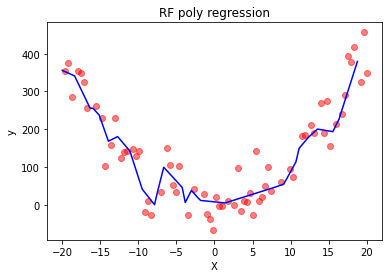

In [44]:
plt.plot(X_test, y_test_pred, '-b')
plt.scatter(X_train, y_train, c="r", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("RF poly regression")
plt.show()

Most performing with f1:


1.   Ridge Linear regression 0.116


2.   SVR -0.017490228542584196

Most performing with f2:



1.   Ridge OLS 0.7892812601912894
2.   RF 0.67


Most performing with f3:



1.   RF: 0.989
2.  Ridge: 0.94





# 2 - Multivariate regression on synthetic data

In [45]:
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.compose import make_column_transformer
import pandas as pd
import seaborn as sns
from prettytable import PrettyTable

In [46]:
models = [
  LinearRegression(),
  Ridge(random_state=42),
  MLPRegressor(hidden_layer_sizes=(10,), random_state=42, max_iter=10000),
  MLPRegressor(hidden_layer_sizes=(10,10), activation='tanh', solver='lbfgs',
    alpha=0.000, batch_size='auto', learning_rate='constant',
    learning_rate_init=0.01, power_t=0.5, max_iter=10000,
    shuffle=True, random_state=42, tol=0.0001, verbose=True, warm_start=False,
    momentum=0.0, nesterovs_momentum=False, early_stopping=False, 
    validation_fraction=0.0, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
  SVR(gamma='scale'),
  RandomForestRegressor(n_estimators=300), 
  make_pipeline(
  make_column_transformer(
    (FunctionTransformer(np.sin), [0]),
    (PolynomialFeatures(5), [0])
    ),

  LinearRegression()),
  make_pipeline(
  make_column_transformer(
    (FunctionTransformer(np.sin), [0]),
    (PolynomialFeatures(5), [0])
    ),
  Ridge(alpha=1)
  )
]

""""""



names = [
  'linreg',
  'ridge',
  'mlp_standard',
  'mlp_tuned',
  'svr',
  'rf',
  f'sin+poly{5}+linreg',
  f'sin+poly{5}+ridge'
]

In [47]:
X, y = make_regression(n_samples=2000, random_state=42)
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']
for model, name in zip(models, names):
  X_train, X_test, y_train, y_test = train_test_split(X, y,
    train_size=.7,
    random_state=42,
    shuffle=True)
  model.fit(X_train, y_train)
  y_hat = model.predict(X_test)
  mse = mean_squared_error(y_test, y_hat)
  r2 = r2_score(y_test, y_hat)
  t.add_row([name, mse, r2])
print(t)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


+------------------+-----------------------+-----------------------+
|      model       |          MSE          |           R2          |
+------------------+-----------------------+-----------------------+
|      linreg      | 1.970468288251995e-25 |          1.0          |
|      ridge       |  0.02658922121774335  |   0.9999993361938854  |
|   mlp_standard   |   59.67097245363082   |   0.998510300243291   |
|    mlp_tuned     |   8701.989031249814   |   0.7827528124699124  |
|       svr        |   38892.56762703369   |  0.029037970232504096 |
|        rf        |   10680.858421874182  |   0.7333498761919315  |
| sin+poly5+linreg |   40959.662185694775  | -0.022567527960518863 |
| sin+poly5+ridge  |   40620.548993992896  | -0.014101487968165127 |
+------------------+-----------------------+-----------------------+


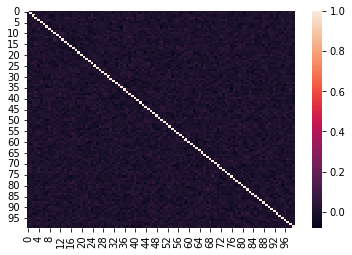

In [48]:
df = pd.DataFrame(X)
ax = sns.heatmap(df.corr())

Let's try to increase the number of informative features as well as we add a bit of noise:

In [49]:
X, y = make_regression(n_samples=2000, random_state=42, noise=10,
n_informative=70)
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']
for model, name in zip(models, names):
  X_train, X_test, y_train, y_test = train_test_split(X, y,
    train_size=.7,
    random_state=42,
    shuffle=True)
  model.fit(X_train, y_train)
  y_hat = model.predict(X_test)
  mse = mean_squared_error(y_test, y_hat)
  r2 = r2_score(y_test, y_hat)
  t.add_row([name, mse, r2])
print(t)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


+------------------+--------------------+----------------------+
|      model       |        MSE         |          R2          |
+------------------+--------------------+----------------------+
|      linreg      | 99.92193369275128  |  0.9996581789295267  |
|      ridge       | 100.17526177647626 |  0.9996573123242324  |
|   mlp_standard   | 151.29645197246361 |  0.9994824328026811  |
|    mlp_tuned     | 69734.85341234905  |  0.7614453467643892  |
|       svr        | 288970.03486527514 | 0.011467822909904779 |
|        rf        | 193146.14710481738 |  0.3392699648491039  |
| sin+poly5+linreg | 287344.5310564188  | 0.01702847842834354  |
| sin+poly5+ridge  | 287575.8006801805  | 0.016237332506315427 |
+------------------+--------------------+----------------------+


# 3 - WW2 Whether

In [50]:
y
!wget https://github.com/dbdmg/data-science-lab/raw/master/datasets/weatherww2.zip

--2021-12-16 14:28:28--  https://github.com/dbdmg/data-science-lab/raw/master/datasets/weatherww2.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/weatherww2.zip [following]
--2021-12-16 14:28:29--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/weatherww2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1693231 (1.6M) [application/zip]
Saving to: ‘weatherww2.zip’

weatherww2.zip      100%[===================>]   1.61M  --.-KB/s    in 0.04s   

2021-12-16 14:28:29 (43.6 MB/s) - ‘weatherww2.zip’ saved [1693231/1693231]



In [51]:
!unzip "/content/weatherww2.zip"

Archive:  /content/weatherww2.zip
   creating: weatherww2/
  inflating: __MACOSX/._weatherww2   
  inflating: weatherww2/WeatherStationLocations.csv  
  inflating: __MACOSX/weatherww2/._WeatherStationLocations.csv  
  inflating: weatherww2/SummaryofWeather.csv  
  inflating: __MACOSX/weatherww2/._SummaryofWeather.csv  


In [52]:
df = pd.read_csv("/content/weatherww2/SummaryofWeather.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [54]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [56]:
df.iloc[:, 0].value_counts().head(10)

22508    2192
10701    2185
22502    2154
22504    2118
10803    1750
11610    1631
16405    1622
11601    1604
10502    1527
11604    1514
Name: STA, dtype: int64

Let's consider only 22508 sensor:

In [57]:
df = df[df.iloc[:,0]==22508]

In [58]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
df.columns

Index(['STA', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp', 'MeanTemp',
       'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR', 'SPD', 'MAX',
       'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT',
       'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

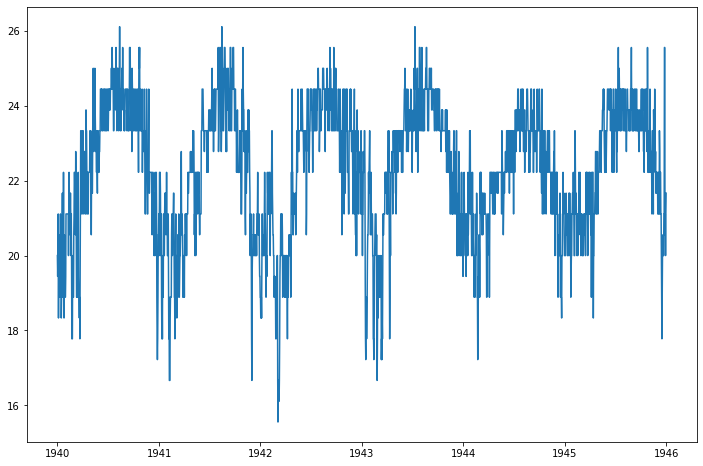

In [60]:
# Time Series
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()
plt.plot((df.index), df['MeanTemp'])

In [77]:
def generateWindow(df, t, W):
  window = df.iloc[t:t+W, 5]
  label = df.iloc[t+W, 5]
  return (window, label)

In [78]:
def generateTrainTestSet(df, W):
  dataset = np.empty((0, W+1), np.float32)
  train_idxs = []
  test_idxs = []
  for t in range(df.shape[0]-(W+1)):
    win, lab = generateWindow(df, t, W)
    row = np.concatenate((win, lab), axis=None).reshape((1, W+1))
    dataset = np.append(dataset, row, axis=0)
    if df.index[t].year in range(1940, 1945):
      train_idxs.append(t)
    else:
      test_idxs.append(t)
      
  X_train, X_test, y_train, y_test = dataset[train_idxs, :W], dataset[test_idxs, :W], dataset[train_idxs, W], dataset[test_idxs, W]

  return X_train, X_test, y_train, y_test

In [105]:
X_train, X_test, y_train, y_test = generateTrainTestSet(df, W=3)

In [92]:
X_test.shape

(361, 3)

In [90]:
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']

for model, name in zip(models, names):
  model.fit(X_train, y_train)
  y_hat = model.predict(X_test)
  mse = mean_squared_error(y_test, y_hat)
  r2 = r2_score(y_test, y_hat)
  t.add_row([name, mse, r2])
print(t)

+------------------+--------------------+----------------------+
|      model       |        MSE         |          R2          |
+------------------+--------------------+----------------------+
|      linreg      | 0.7715757915044672 |  0.6680548800665158  |
|      ridge       | 0.7715109708976027 |  0.668082767001742   |
|   mlp_standard   | 0.7768422857538341 |  0.6657891440435822  |
|    mlp_tuned     | 2.404475022190201  | -0.03444633489822557 |
|       svr        | 0.7618929189302558 |  0.6722206176821037  |
|        rf        | 0.833786243465889  |  0.6412908781825468  |
| sin+poly5+linreg | 1.1428341898377767 |  0.5083331587295001  |
| sin+poly5+ridge  | 1.1424806997436656 |  0.5084852362220511  |
+------------------+--------------------+----------------------+


Let's plot results for the best scoring model:
we

In [95]:
from datetime import date

initial_day = date(1944, 12, 31) + pd.Timedelta(f"{5} days")
initial_day

datetime.date(1945, 1, 5)

In [96]:
df.loc[initial_day:].shape

(361, 30)

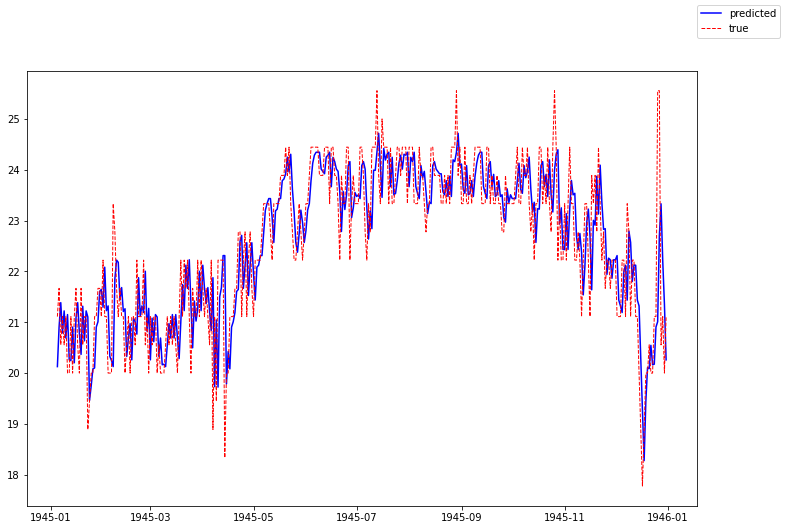

In [97]:
svr = SVR(gamma='scale')
svr.fit(X_train, y_train)

fig = plt.figure(figsize=(12, 8))
ax = plt.axes()
y_hat = svr.predict(X_test)
plt.plot(df.loc[initial_day:].index, y_hat, c='b')
plt.plot(df.loc[initial_day:].index, y_test, c='r', linestyle='dashed', linewidth=1)
plt.figlegend(['predicted', 'true'])

Let's do Grid Search on Ridge:

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

# for Ridge:
reg = Ridge()
param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 2],
              'fit_intercept': [True, False]}
gridsearch = GridSearchCV(reg, param_grid, scoring=('r2'),\
                          cv=TimeSeriesSplit(n_splits=5), refit=True)
gridsearch.fit(X_train, y_train)

print("Best alpha: ", gridsearch.best_params_['alpha'])
print("Best score on training: ", gridsearch.best_score_)
print(gridsearch.best_params_['fit_intercept'])

best_configured_model = gridsearch.best_estimator_
y_hat = best_configured_model.predict(X_test)
print("R2 score on test set: ", r2_score(y_pred=y_hat, y_true=y_test))

Best alpha:  2
Best score on training:  0.7513864028888346
True
R2 score on test set:  0.6681105006293798


In [107]:
svr = SVR(gamma='scale')
svr.fit(X_train, y_train)

param_grid = {'epsilon': [0.1, 0.2, 0.5, 0.7, 0.9, 1, 2],
              'kernel': ['rbf']}
gridsearch = GridSearchCV(svr, param_grid, scoring=('r2'),\
                          cv=TimeSeriesSplit(n_splits=5), refit=True)
gridsearch.fit(X_train, y_train)

print("Best epsilon: ", gridsearch.best_params_['epsilon'])
print("Best score on training: ", gridsearch.best_score_)
print(gridsearch.best_params_['kernel'])

best_configured_model = gridsearch.best_estimator_
y_hat = best_configured_model.predict(X_test)
print("R2 score on test set: ", r2_score(y_pred=y_hat, y_true=y_test))

Best epsilon:  0.2
Best score on training:  0.7330802772846846
rbf
R2 score on test set:  0.679642911093479
